In [4]:
#STEP 1: Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [5]:
#STEP 2: Load Dataset
import pandas as pd

df = pd.read_csv("data/online_shoppers_intention.csv")

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())


✅ Data Loaded Successfully!
Shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0

In [6]:
#STEP 3: Preprocess Data
# Convert target column Revenue to numeric (True/False → 1/0)
df['Revenue'] = df['Revenue'].astype(int)

# Handle categorical columns
categorical_cols = ['Month', 'VisitorType']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Convert any other object/boolean columns to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Check missing values
print("\nMissing Values:\n", df.isnull().sum().sum())



Missing Values:
 0


In [7]:
#STEP 4: Prepare Features and Labels

X = df.drop('Revenue', axis=1).values
y = df['Revenue'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining examples: {X_train.shape[0]}")
print(f"Testing examples:  {X_test.shape[0]}")


Training examples: 9864
Testing examples:  2466


In [8]:
#STEP 5: Define Logistic Regression Functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    cost = (-1/m) * np.sum(y*np.log(f_wb + 1e-8) + (1 - y)*np.log(1 - f_wb + 1e-8))
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    dj_dw = (1/m) * np.dot(X.T, (f_wb - y))
    dj_db = (1/m) * np.sum(f_wb - y)
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    w = w_in.copy()
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)
            print(f"Iteration {i:4d}: Cost {cost:.4f}")

    return w, b, J_history

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b) >= 0.5

In [9]:
#STEP 6: Initialize and Train Model

np.random.seed(1)
w_init = np.random.randn(X_train.shape[1])
b_init = 0.0

alpha = 0.01
num_iters = 1500

w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters)


Iteration    0: Cost 1.6212
Iteration  100: Cost 1.3282
Iteration  200: Cost 1.1000
Iteration  300: Cost 0.9258
Iteration  400: Cost 0.7930
Iteration  500: Cost 0.6912
Iteration  600: Cost 0.6129
Iteration  700: Cost 0.5525
Iteration  800: Cost 0.5059
Iteration  900: Cost 0.4699
Iteration 1000: Cost 0.4421
Iteration 1100: Cost 0.4204
Iteration 1200: Cost 0.4033
Iteration 1300: Cost 0.3897
Iteration 1400: Cost 0.3788



✅ Model Accuracy on Test Set: 85.93%


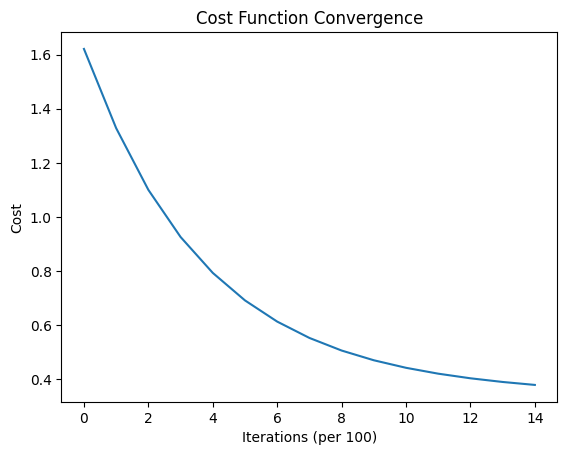

In [10]:
#STEP 7: Evaluate Model

predictions = predict(X_test, w_final, b_final)
accuracy = np.mean(predictions == y_test) * 100
print(f"\n✅ Model Accuracy on Test Set: {accuracy:.2f}%")

# Plot cost vs iteration
plt.plot(J_hist)
plt.xlabel("Iterations (per 100)")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()


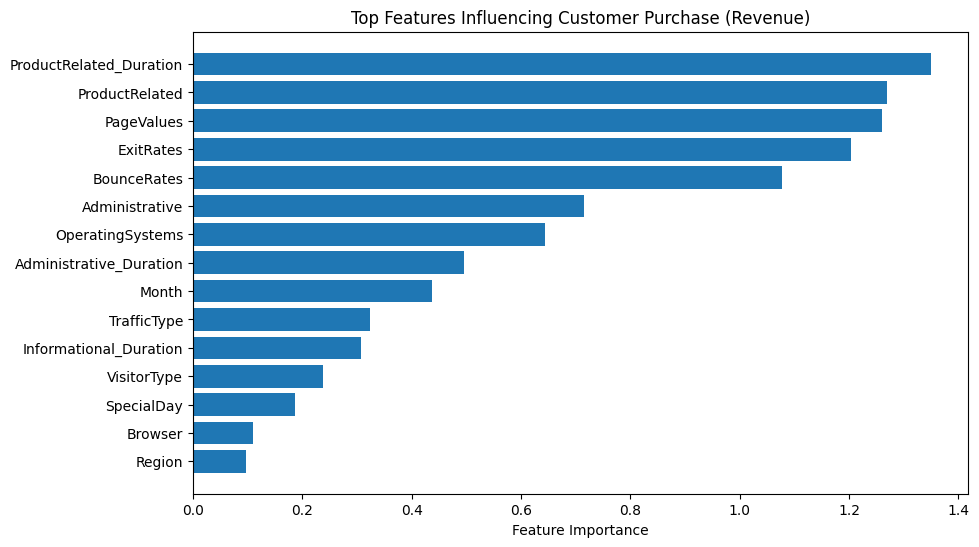

In [12]:
#STEP 8: Feature Importance Visualization

feature_names = df.drop('Revenue', axis=1).columns
importance = np.abs(w_final)
sorted_idx = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx][:15], importance[sorted_idx][:15])
plt.xlabel("Feature Importance")
plt.title("Top Features Influencing Customer Purchase (Revenue)")
plt.gca().invert_yaxis()
plt.show()


In [13]:
#STEP 9: Optional — Compare with Scikit-learn Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"✅ Sklearn Logistic Regression Accuracy: {lr.score(X_test, y_test)*100:.2f}%")

✅ Sklearn Logistic Regression Accuracy: 88.32%
